In [53]:
# packages
import numpy as np  # matrix and vector operations
import matplotlib.pyplot as plt  # visualization
#import fssa as fssa  # scaling collapse 
from utils import *  # all things ID of MBL
from time import time
import glob
import numpy.ma as ma
from plotting import *
import scipy as sp
import seaborn as sns
from tqdm import tqdm

import matplotlib as mpl
fig_size_dim    = 4
golden_ratio    = (1+np.sqrt(5))/2
fig_size        = (fig_size_dim, fig_size_dim/golden_ratio)

def plot_style():
    font_size       = 12
    dpi             = 200

    params = {'figure.figsize': fig_size,
              'figure.dpi': dpi,
              'savefig.dpi': dpi,
              'font.size': font_size,
              'font.family': "sans-serif",
              'font.sans-serif': ["Helvetica"],
              'figure.titlesize': font_size,
              'legend.fontsize': font_size,
              'axes.labelsize': font_size,
              'axes.titlesize': font_size,
              'xtick.labelsize': font_size,
              'ytick.labelsize': font_size,
              'text.usetex': True,
             }

    plt.rcParams.update(params)
plot_style()

In [2]:
## Global variables
# List of available system sizes
Ls = [8, 10, 12, 14]
# List of available disorder strengths
Ws = np.concatenate([np.arange(1,2.6,0.2), np.arange(2.6,4.55,0.05), np.arange(4.7,6.2,0.2)])

# Download data
# TODO (curl from ERDA)

In [164]:
def ODPM(i, j, L):
    num_states = binomial(L)
    C = np.zeros((num_states,num_states))
    (s2i, i2s) = basisStates(L)
    
   # print(s2i)
    
    for key in s2i.keys():
#         if (key[i] == '1') and (key[j] == '0'):
#             new_state = [x for x in key]
#             new_state[i] = '0'
#             new_state[j] = '1'
#             new_state = ''.join(new_state)
#             C[s2i[new_state], s2i[key]], C[s2i[key], s2i[new_state]] = 1, 1
            
        if( i == j ):
            if (key[i] == '1'):
                C[ s2i[key], s2i[key]] = 1
            if (key[i] == '0'):
                C[ s2i[key], s2i[key]] = 0
            
    return C

def n(i, L):
    num_states = binomial(L)
    C = np.zeros((num_states,num_states))
    (s2i, i2s) = basisStates(L)
    print(s2i)
    for key in s2i.keys():
        if (key[i] == '1'):
            C[ s2i[key], s2i[key]] = 1
            
    return C

n(1,4)

{'0011': 0, '0101': 1, '0110': 2, '1001': 3, '1010': 4, '1100': 5}


array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [171]:
from utils import *

result = {}
num_seeds = 100
tmp_ws = [1, 12]

for L in [10]:
    
    ODPMs = {}
    for i in range(L):
        ODPMs[i] = {}
        for j in range(L):
            ODPMs[i][j] = ODPM(i,j,L)
    
    result[L] = {}
    for W in tmp_ws:
        result[L][W] = []
        for seed in range(num_seeds):    
            H = constructHamiltonian(L = L, W = W, U = 1.0, t = 1.0, seed=seed)
            eigvals, eigvecs = np.linalg.eigh(H)
            
            #print(eigvals)
            epsilon = 2*(eigvals - np.min(eigvals))/(np.max(eigvals) - np.min(eigvals))
            #print(epsilon)
            
            idx = np.argmin( np.abs(epsilon - 1) )
            ev = eigvecs[:,idx]
            
            rho = np.zeros( (L, L) )
            for i in range(L):
                for j in range(L):
                    rho[i,j] = np.dot(ev.conj().T, np.dot(ODPMs[i][j], ev))
                    
            # Diagonalie ODPM
            occupations, _ = np.linalg.eigh(rho)
        
            result[L][W].append( occupations )

(array([347.,  60.,  38.,  33.,  23.,  24.,  29.,  41.,  65., 340.]),
 array([6.28127323e-05, 1.00054299e-01, 2.00045785e-01, 3.00037271e-01,
        4.00028756e-01, 5.00020242e-01, 6.00011728e-01, 7.00003214e-01,
        7.99994700e-01, 8.99986186e-01, 9.99977672e-01]),
 <BarContainer object of 10 artists>)

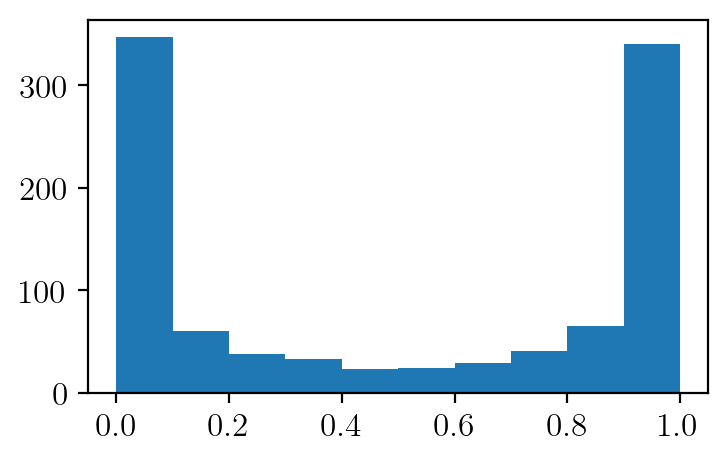

In [172]:
#plt.hist( np.array([result[10][1][a] for a in range(1,num_seeds)]).flatten() )
plt.hist( np.array(result[10][12]).flatten() )

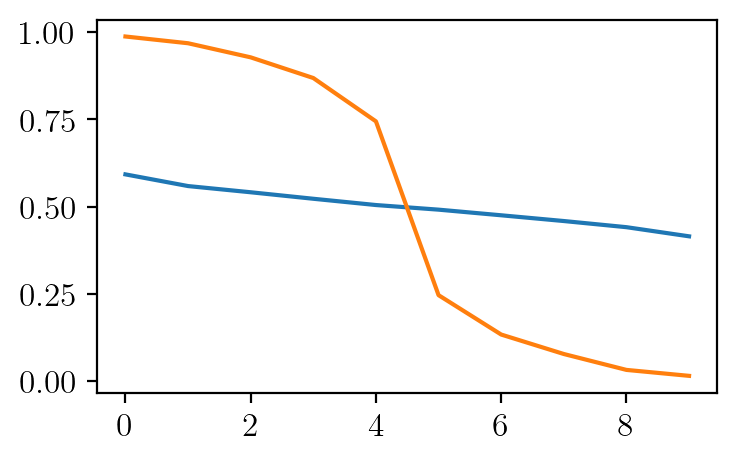

In [173]:
plt.plot( np.sort(np.mean(result[10][1], axis=0))[::-1] )
plt.plot( np.sort(np.mean(result[10][12], axis=0))[::-1] )